In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from missmecha.analysis import MCARTest, report, visual
from missmecha.generate.mnar import MNARType6
from missmecha.evaluation import imp_eval

# Simulate a sample DataFrame
df = pd.DataFrame({
    "age": [25, 30, 22, 40, 35, 50, 28, 33, 27, 45],
    "income": [3000, 4500, 2800, 5200, 4100, 6000, 3900, 4800, 3100, 5500],
    "score": [0.8, 0.6, 0.75, 0.9, 0.65, 0.92, 0.7, 0.85, 0.77, 0.88]
})

# Define info dictionary for generate()
info = {
    "rate": 0.2,  # 20% missingness
    "type": 1     # Use type_two generator
}

def type_two(data, missing_rate=0.1, seed=1):
    verify_missing_rate(missing_rate)
    data = data.astype(float)
    total_elements = data.size
    missing_elements = int(total_elements * missing_rate)

    data_with_missing = data.copy()
    np.random.seed(seed)
    mask_indices = np.random.choice(total_elements, missing_elements, replace=False)
    multi_indices = np.unravel_index(mask_indices, data.shape)
    data_with_missing[multi_indices] = np.nan

    return data_with_missing


# Run the test using generate
data_with_missing = type_two(df, missing_rate=0.1)



TypeError: unhashable type: 'numpy.ndarray'

In [1]:
def verify_missing_rate(rate, var_name="missing_rate"):
    """
    Verify that the missing rate is between 0 and 1 (inclusive).

    Parameters
    ----------
    rate : float
        The missing rate to check.
    var_name : str, optional
        Variable name to show in the error message.

    Raises
    ------
    ValueError
        If the rate is not in the range [0, 1].
    """
    if not isinstance(rate, (float, int)):
        raise TypeError(f"{var_name} must be a float or int.")
    if not (0 <= rate <= 1):
        raise ValueError(f"{var_name} must be between 0 and 1 (got {rate}).")


In [ ]:
df = pd.DataFrame({
    "age": [25, 30, np.nan, 40],
    "income": [3000, np.nan, 2800, 5200],
    "gender": ["M", "F", np.nan, "F"]
})

result = report.missing_rate(df)




Overall missing rate: 25.00% (3 / 12 values are missed)


In [2]:
result['report']  # per-column summary


,n_missing,missing_rate (%),n_unique,dtype,n_total
column,,,,,
age,1,25.0,3,float64,4
income,1,25.0,3,float64,4
gender,1,25.0,2,object,4


In [3]:
result['overall_missing_rate']  # overall %

25.0

In [ ]:

collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")
data = collisions.sample(250)
df = pd.read_csv("_data.txt", delimiter=",", header=None)

# Simulated larger dataset with some missing values
df = pd.DataFrame({
    "DATE": ["09/10/2016", "03/31/2016", "03/16/2016", "04/01/2016", np.nan, "04/03/2016"],
    "TIME": ["12:09:00", "22:10:00", "14:58:00", np.nan, "08:30:00", "19:00:00"],
    "BOROUGH": ["QUEENS", "BROOKLYN", "MANHATTAN", "QUEENS", "BRONX", np.nan],
    "ZIP CODE": ["11427", "11223", "10001", "11434", np.nan, "10010"],
    "LATITUDE": [40.724692, 40.598761, 40.712776, np.nan, 40.850000, 40.755000],
    "LONGITUDE": [-73.874245, -73.987843, -74.006058, -73.900000, -73.880000, np.nan],
    "VEHICLE TYPE": ["BICYCLE", "PASSENGER VEHICLE", "TAXI", "SUV", np.nan, "BICYCLE"]
})

def type_convert(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])
            except ValueError:
                 df[col] = df[col].astype('category').cat.codes

        else:
            df[col].to_numpy(dtype=float) 

    return df
# Convert using your helper
converted_array = type_convert(df)

null_pattern =(np.random.random(10000).reshape((500, 20))> 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
ts = null_pattern.set_index(pd.period_range('1/1/2011', '5/14/2012', freq='D'))
# visual.matrix(ts,cmap="GnBu",ts=True)
# visual.matrix(df,cmap="GnBu")
# visual.matrix(data,cmap="GnBu",color=False)
# visual.heatmap(ts)
# visual.heatmap(df)
# visual.heatmap(data)

In [ ]:
# Step 1: Create complete test data
np.random.seed(0)
df_true = pd.DataFrame({
    "A": np.random.normal(loc=10, scale=2, size=100),
    "B": np.random.normal(loc=0, scale=1, size=100),
    "C": np.random.normal(loc=50, scale=10, size=100)
})

# Step 2: Inject missing values (20%)
mask = np.random.rand(*df_true.shape) < 0.2
df_incomplete = df_true.mask(mask)

# Step 3: Simple imputation with column means
df_filled = df_incomplete.fillna(df_incomplete.mean().round())

results = imp_eval(df_true, df_filled, df_incomplete, method="rmse")
print("Per-column RMSE:", results["column_scores"])
print("Overall RMSE:", results["overall_score"])

status = {
    "A": "num",
    "B": "cat",
    "C": "disc"
}

# Even though method="mae", it's only used for numeric columns
# categorical columns will be evaluated by accuracy
scores = imp_eval(df_true, df_filled, df_incomplete, method="mae", status=status)
print("Per-column RMSE:", scores["column_scores"])
print("Overall RMSE:", scores["overall_score"])


Per-column RMSE: {'A': 1.4817116029992137, 'B': 0.9307352818998821, 'C': 8.79733248775861}
Overall RMSE: 3.736593124219235


{'A': 1.133288651991824}
0.0
{'A': 1.133288651991824, 'B': 0.0}
0.0
{'A': 1.133288651991824, 'B': 0.0, 'C': 0.0}
{'A': 1.133288651991824, 'B': 0.0, 'C': 0.0}
Per-column RMSE: {'A': 1.133288651991824, 'B': 0.0, 'C': 0.0}
Overall RMSE: 0.37776288399727465


In [ ]:
# 生成标准正态分布数据
rng = np.random.default_rng(42)
data = rng.normal(0, 1, size=(10000, 5))
df = pd.DataFrame(data, columns=[f"X{i}" for i in range(5)])

# 使用极端分位点 1% 注入缺失
mnar_gen = MNARType6(missing_rate=0.50, seed=42)  # 1% quantile threshold
mnar_gen.fit(df)
df_missing = mnar_gen.transform(df)

# 检查缺失情况
print("缺失比例：")
print(df_missing.isnull().mean())

# 运行 Little’s MCAR test
test = MCARTest(method="little")
p = test(df_missing)

print("\n===== Little’s MCAR Test =====")
print(f"p-value: {p:.5f}")
if p < 0.05:
    print("❌ Reject H0: Data is NOT MCAR (good! detected MNAR)")
else:
    print("✅ Fail to reject H0: Data looks like MCAR (unexpected!)")


缺失比例：
X0    0.5
X1    0.5
X2    0.5
X3    0.5
X4    0.5
dtype: float64
📊 Little's MCAR Test
   ➤ p-value: 0.154863
   ✅ Fail to reject H₀: Data *may* be MCAR (p ≥ 0.05)
   👍 MCAR-compatible methods (e.g., mean imputation) may be appropriate.

===== Little’s MCAR Test =====
p-value: 0.15486
✅ Fail to reject H0: Data looks like MCAR (unexpected!)


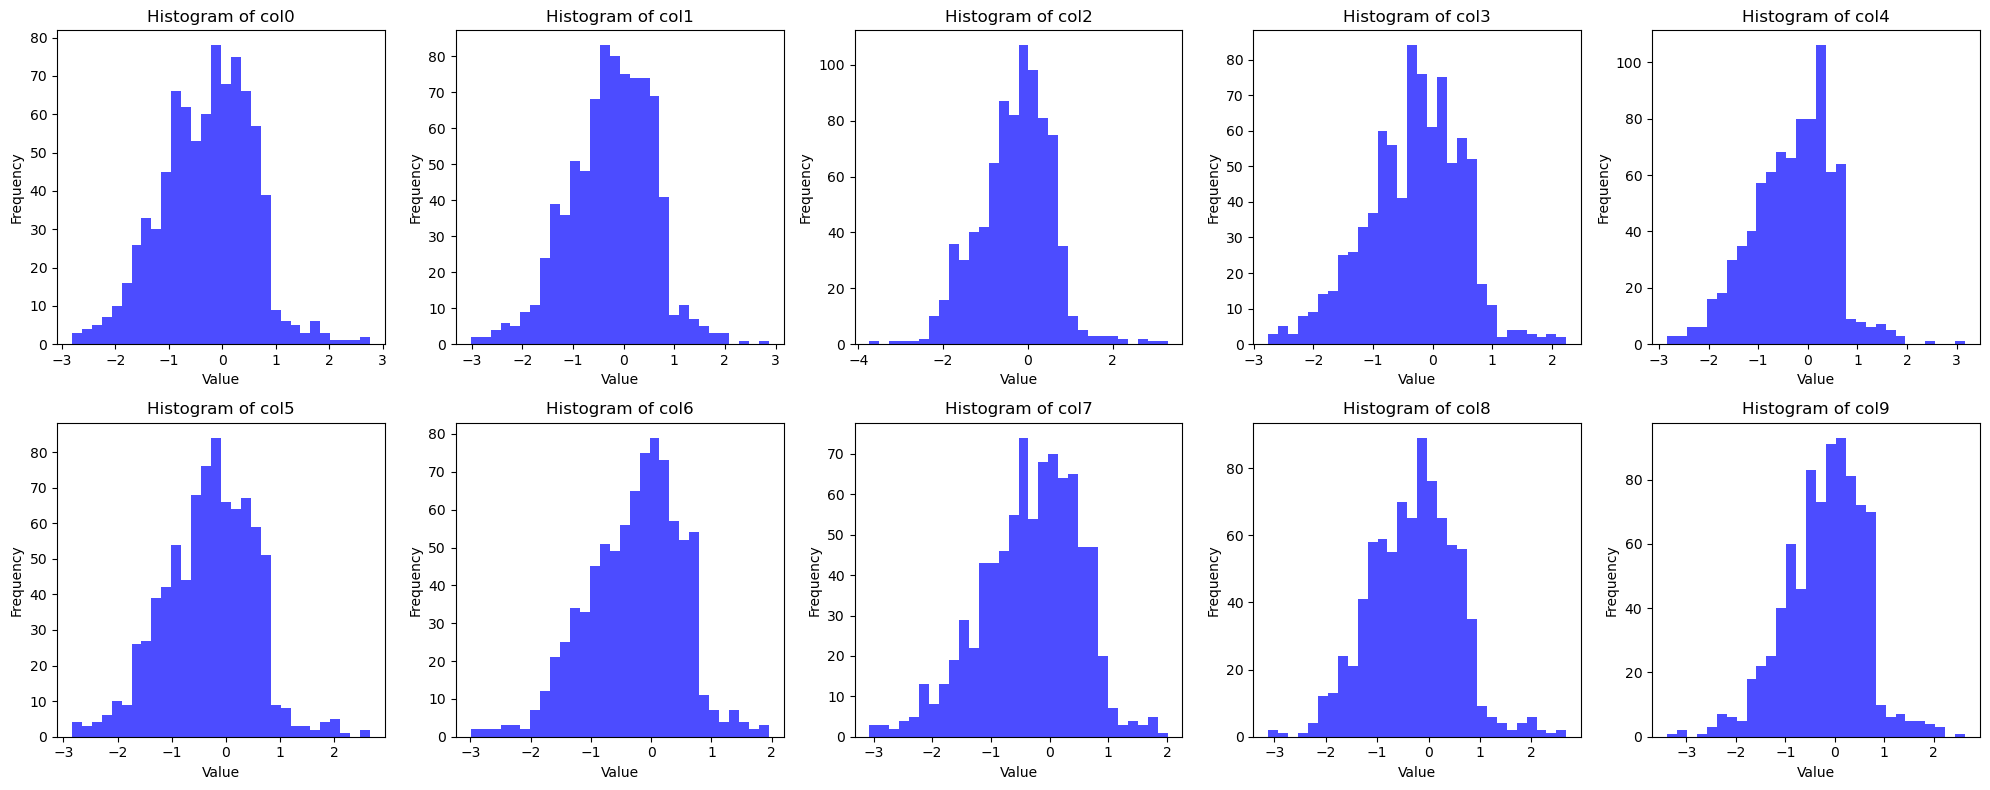

In [ ]:

# Regenerate the dataset
np.random.seed(0)
X = np.random.normal(loc=0, scale=1, size=(1000, 10))
df = pd.DataFrame(X, columns=[f"col{i}" for i in range(X.shape[1])])

# Create MNAR pattern: mask 50% of values above the median
df_mnar = df.copy()
rng = np.random.default_rng(42)  # 确保可复现

for col in df.columns:
    col_values = df[col]
    # 找到 top 20% 的值（上分位数）
    threshold = np.quantile(col_values, 0.8)
    idx_top20 = df[df[col] >= threshold].index

    # 从中抽取 80% 的样本作为缺失点
    n_missing = int(len(idx_top20) * 0.8)
    to_nan = rng.choice(idx_top20, size=n_missing, replace=False)

    # 设为 NaN
    df_mnar.loc[to_nan, col] = np.nan


# Plot histograms
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axs = axs.ravel()

for i, col in enumerate(df.columns):
    axs[i].hist(df_mnar[col].dropna(), bins=30, alpha=0.7, color='blue')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [20]:
test = MCARTest(method="little")
p_value = test(df_mnar)



📊 Little's MCAR Test
   ➤ p-value: 0.320446
   ✅ Fail to reject H₀: Data *may* be MCAR (p ≥ 0.05)
   👍 MCAR-compatible methods (e.g., mean imputation) may be appropriate.


In [8]:
MNARType6

missmecha.generate.mnar.MNARType6